In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [14]:
def mse(y,p):
    '''Mean Squared Error'''
    return 0.5*(np.mean((y - p)**2))

def augment_data(x,k):
    '''
    Augments a vector to matrix containing the polynomials
    up to order k.
    
    Returns matrix with shape (len(x),k+1)
    --------------------------------------
    X = [[1, x0, x0^2, ..., x0^k],
         [1, x1, x1^2, ..., x1^k],
          .    .    .    .    .
          .    .    .    .    .
         [1, xm, xm^2, ..., xm^k]]
    '''
    if k == 0:
        return np.ones((len(x),1))
    X = np.ones((len(x)))
    for i in range(k):
        X = np.vstack((X, x**(i+1)))
    return X.T

In [3]:
def poly_reg(x, y, eta, k, t, lam=0, plot=True, epsilon=1e-7):
    '''
    Performs a polynomial regression.
    
    Parameters
    ----------
    x:         input vector
    y:         output vector
    eta:       learning rate
    k:         order of polynomial
    t:         maximum loop times
    plot:      Boolean, whether or not to plot
    lam:       regularization coefficient lambda (default = 0)
    epsilon:   optional termination variable
    '''
    
    m = len(x)
    mseVector = []
    # make weight-vector
    #w = np.random.rand(k+1)
    w = np.ones(k+1)
    gradient = np.zeros(k+1)
    # augment data 
    X = augment_data(x,k)
    
    for _ in range(t):
        # Prediction (X=[1,x,x^2,...,x^k] * w=[w0,w1,...,wk])
        p = X @ w
        # L2 Regularization term
        reg_term = lam/(2*m) * (w.T @ w)
        # calculate Error (MSE + L2 reg.)
        mseVector.append(mse(y,p) + reg_term)
        # calculate gradient
        gradient = ((X.T @ (p - y))+ lam*w)/m
        
        #check termination criteria
        #if (np.linalg.norm(eta * gradient) < epsilon):
            #break
            
        #update weight vector
        w -= eta * gradient
        #eta *= 0.9
    
    # plotting
    if plot:
        plt.figure(figsize=(20, 10))
        plt.suptitle("Polynomial Regression, Order k=%d, Lambda=%.3f" % (k,lam),
                     size=20, fontweight='bold')
        plt.xlabel("x", size=20)
        plt.ylabel("y", size=20)
        #plt.xlim([-50,350])
        #plt.ylim([0,30])
        plt.scatter(x,y)
        l = np.linspace(-1.5,1)
        L = augment_data(l,k)
        plt.plot(l, L@w, color="red")
        plt.show()
        print("learned weights:",w)
        print("MSE:", mseVector[-1])
        
    return (w, mseVector)

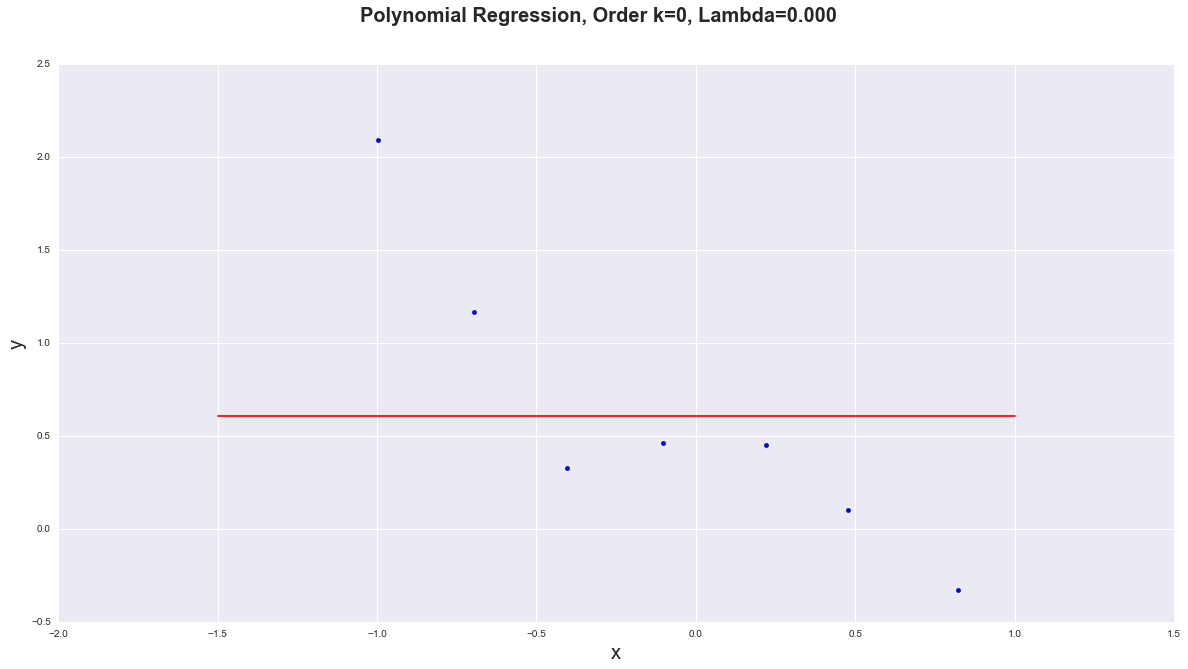

learned weights: [ 0.60867776]
MSE: 0.268857491686


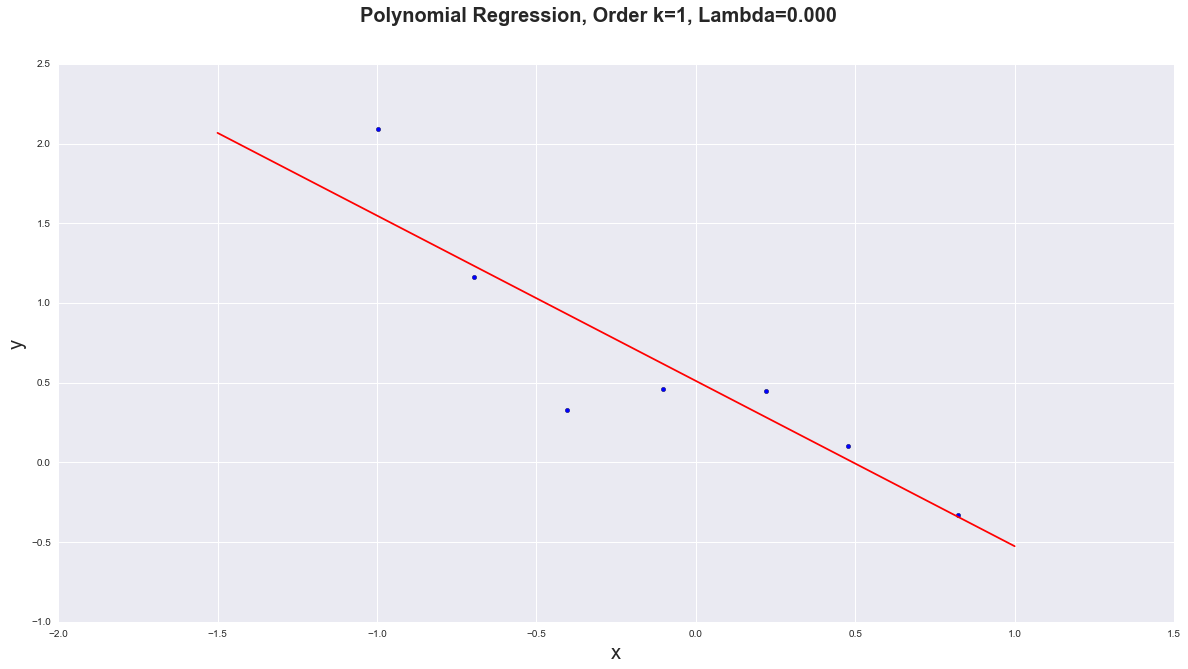

learned weights: [ 0.51120314 -1.03704191]
MSE: 0.0514135379594


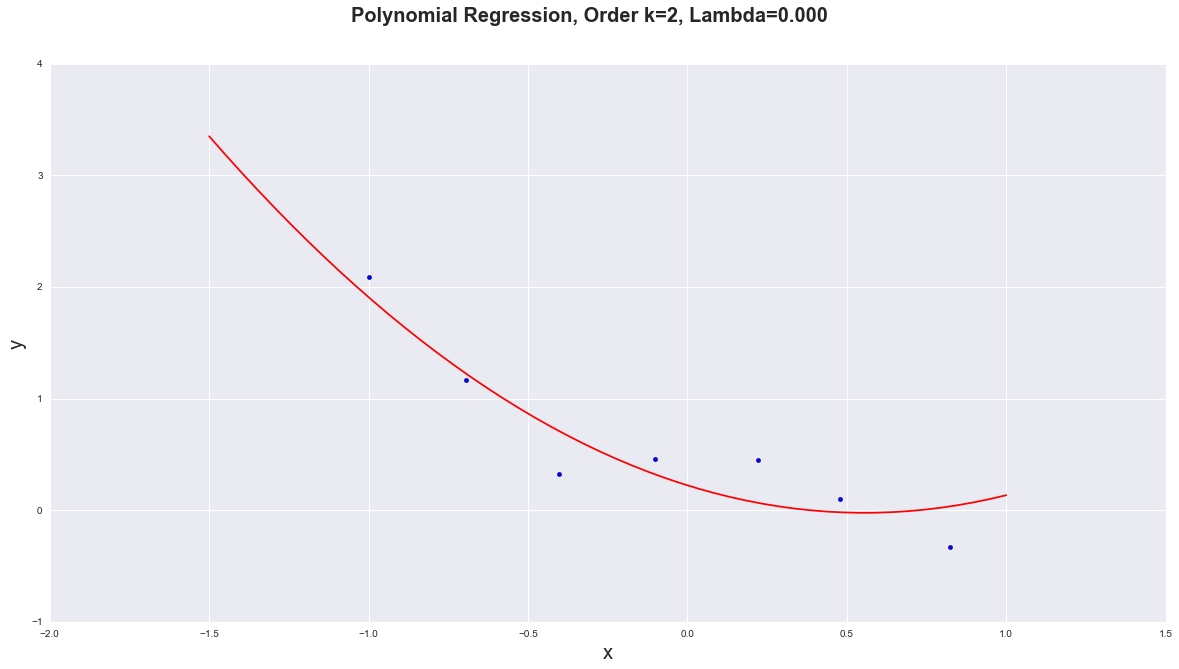

learned weights: [ 0.22273371 -0.88712867  0.79895098]
MSE: 0.0353847046424


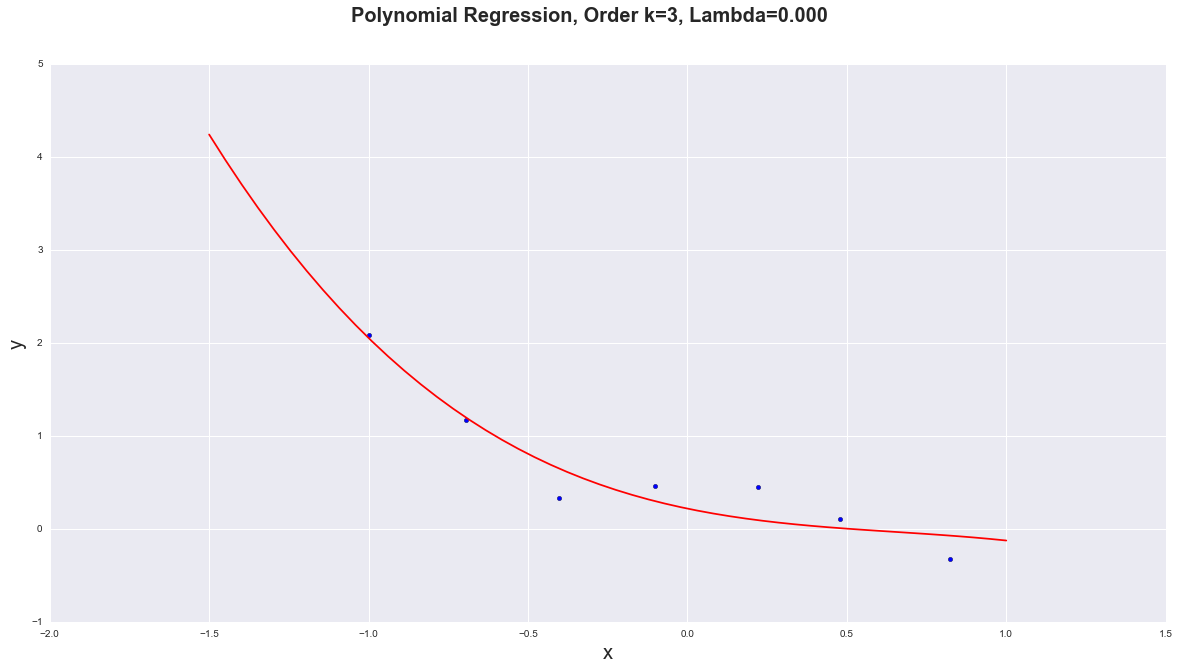

learned weights: [ 0.2172466  -0.70943765  0.74564424 -0.3794669 ]
MSE: 0.0238058132168


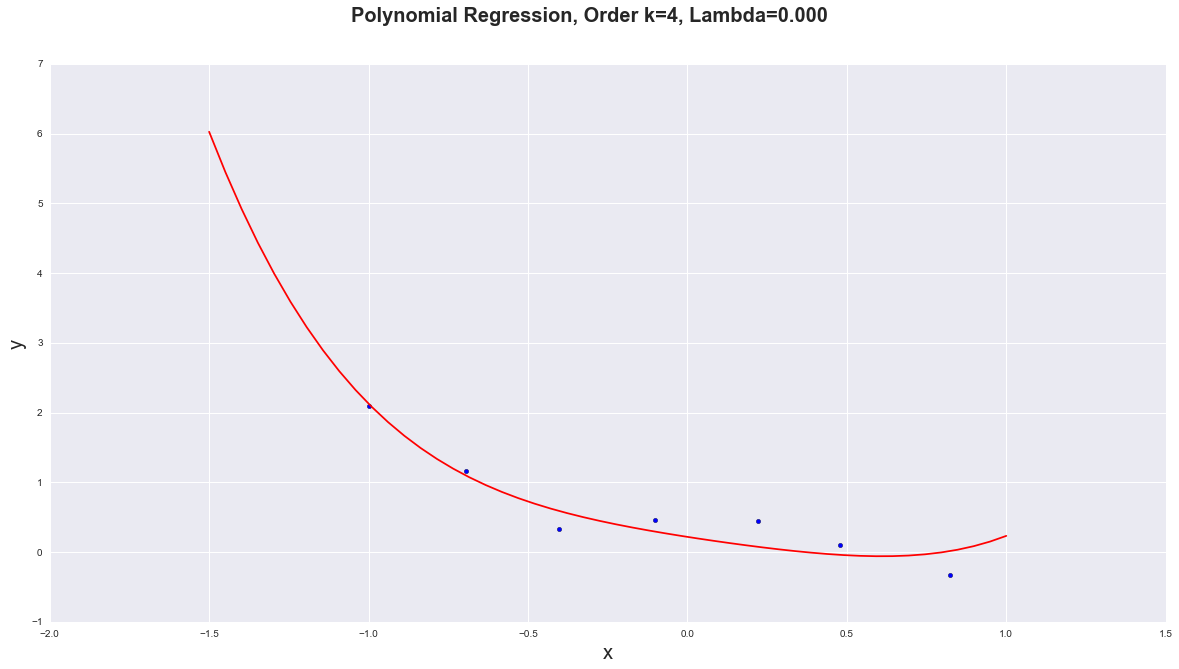

learned weights: [ 0.21743374 -0.71164859  0.32916044 -0.23600408  0.63280947]
MSE: 0.0269209603172


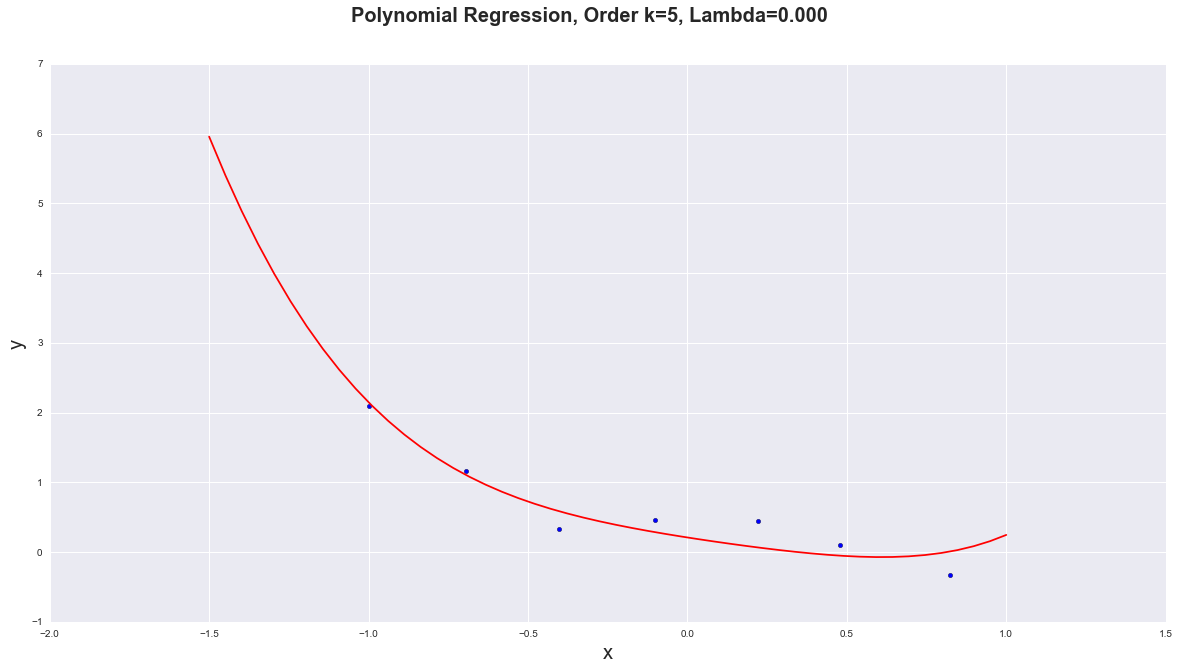

learned weights: [ 0.20897458 -0.71411261  0.33257407 -0.28159831  0.65507212  0.04467822]
MSE: 0.0274398953255


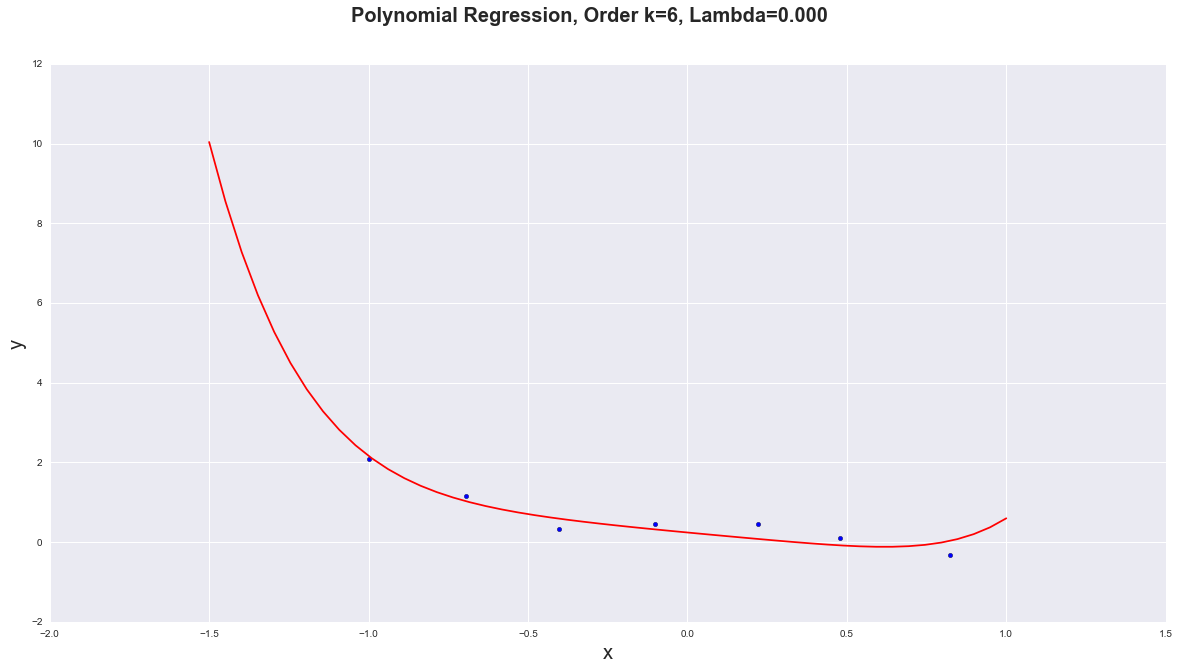

learned weights: [ 0.24052346 -0.7530956   0.11930393 -0.20798248  0.40591847  0.1778621
  0.61392712]
MSE: 0.029092690952


In [4]:
# read data
df=pd.read_csv('poly.csv', sep=';',header=0)
x = np.asanyarray(df.iloc[:,0])
y = np.asanyarray(df.iloc[:,1])

# perform polynomial regression: order k = 0,1,2,...,6
# plot fitted polynoms
errors = []
for k in range(7):
    wtemp, etemp = poly_reg(x,y,1e-4,k, 100000)
    errors.append(etemp)

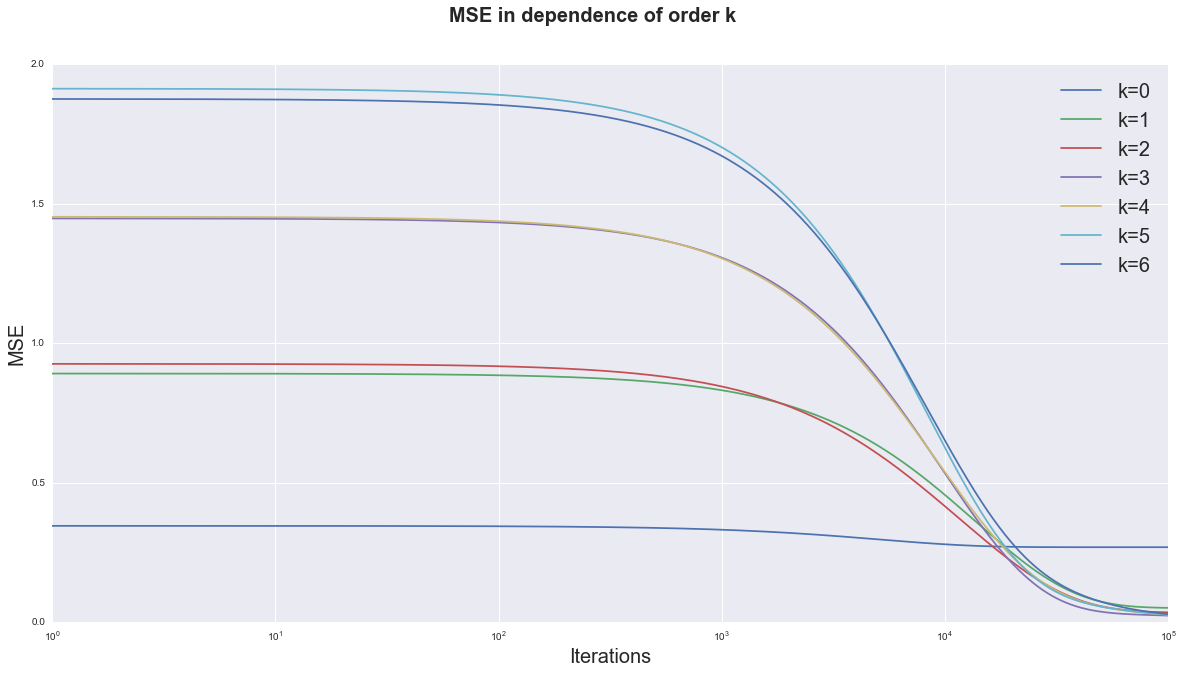

In [5]:
# plot MSE in dependence of order k
plt.figure(figsize=(20,10))
for k in range(7):
    plt.semilogx(errors[k], label= "k=%d" %k)
plt.suptitle("MSE in dependence of order k", size=20, fontweight='bold')
plt.xlabel("Iterations", size=20)
plt.ylabel("MSE", size=20)
plt.legend(fontsize=20)

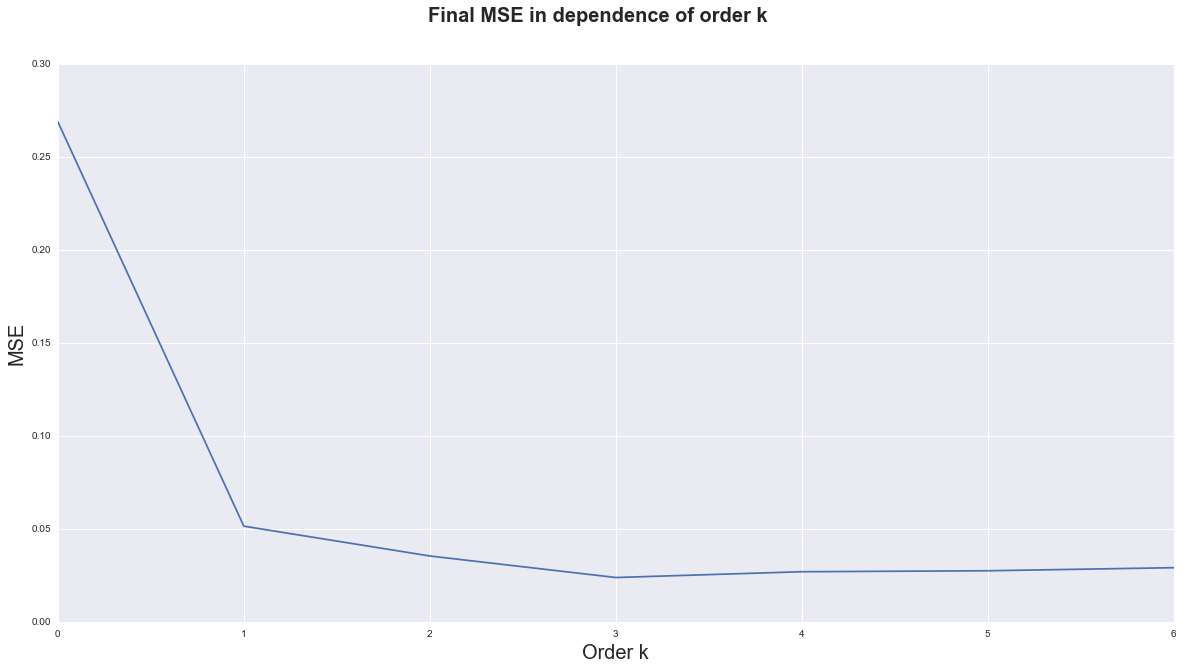

In [6]:
errors = np.asanyarray(errors)
plt.figure(figsize=(20,10))
plt.suptitle("Final MSE in dependence of order k", size=20, fontweight='bold')
plt.xlabel("Order k",size=20)
plt.ylabel("MSE",size=20)
plt.plot(errors[:,-1])

In [7]:
lambdas = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
errors = []
for lam in lambdas:
    wtemp, etemp = poly_reg(x,y,1e-4,6,100000, lam, plot=False)
    errors.append(etemp)

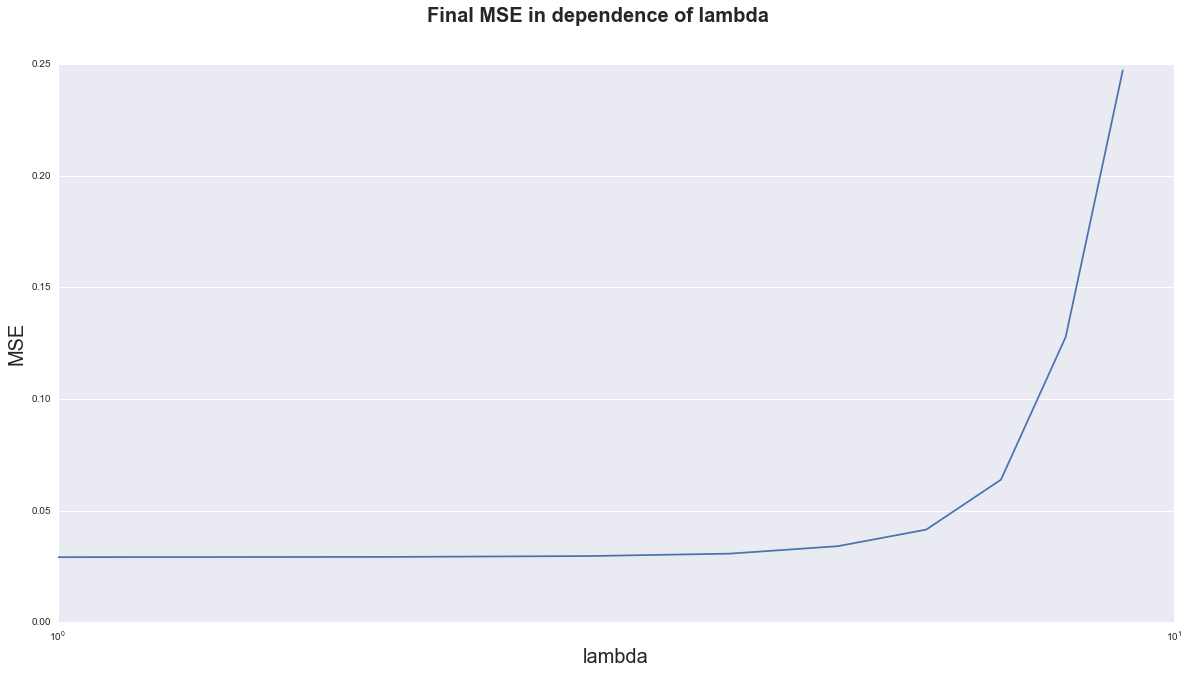

In [8]:
errors = np.asanyarray(errors)
plt.figure(figsize=(20,10))
plt.suptitle("Final MSE in dependence of lambda", size=20, fontweight='bold')
plt.xlabel("lambda",size=20)
plt.ylabel("MSE",size=20)
plt.semilogx(errors[:,-1])

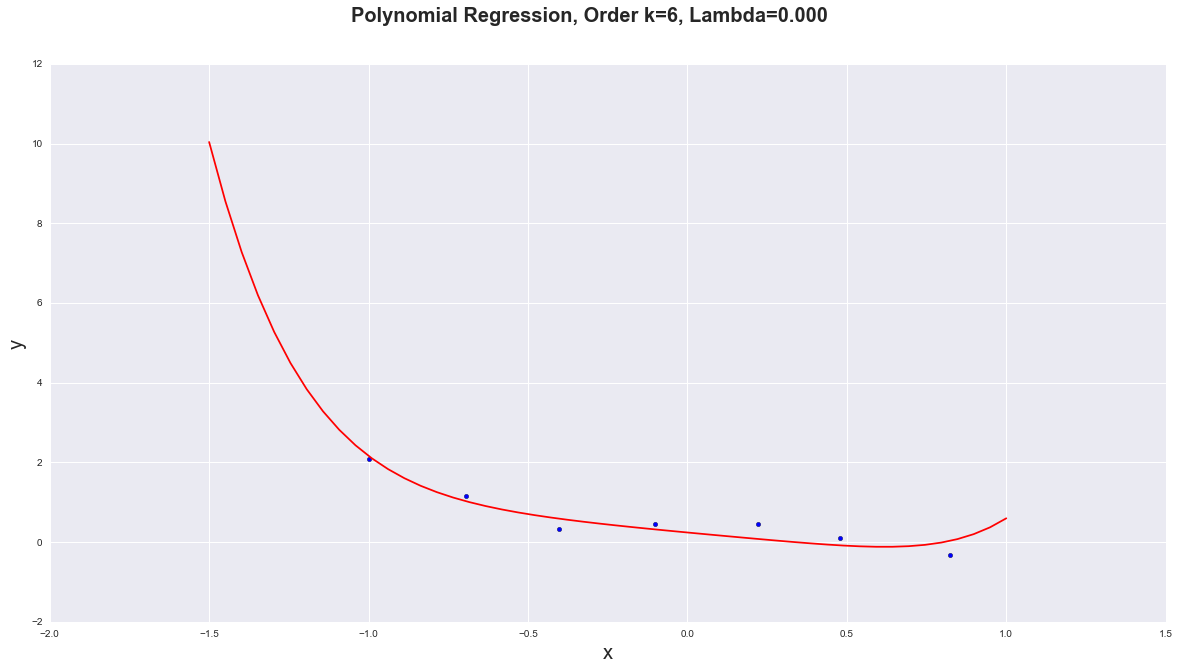

learned weights: [ 0.24052346 -0.7530956   0.11930393 -0.20798248  0.40591847  0.1778621
  0.61392712]
MSE: 0.029092690952


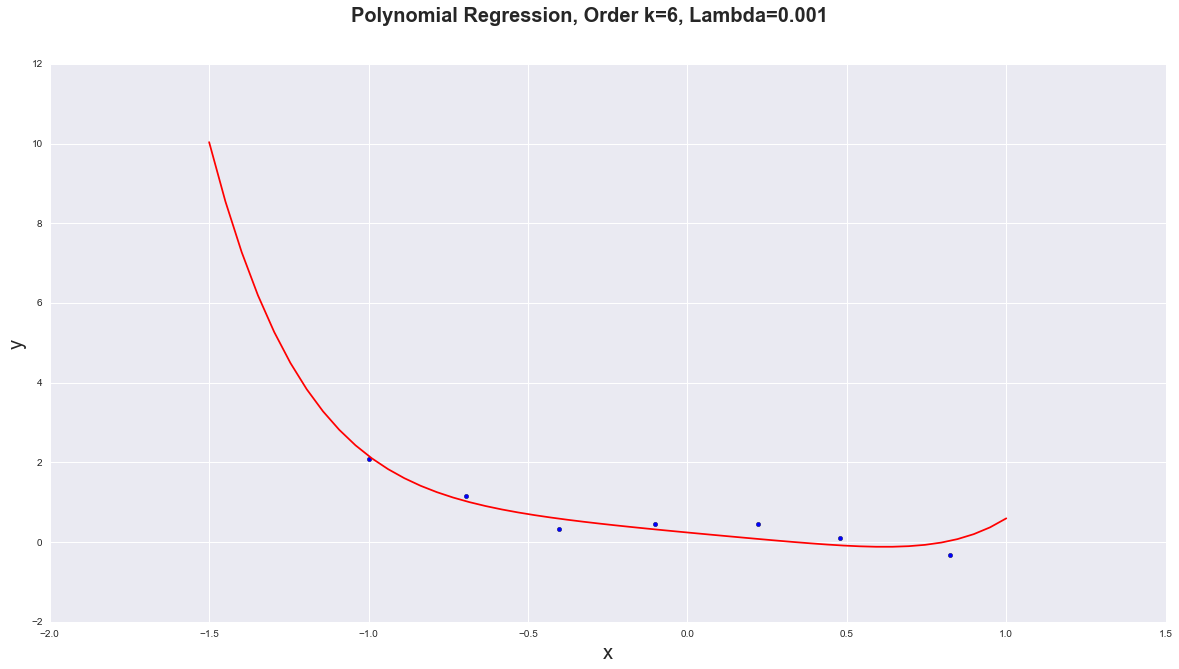

learned weights: [ 0.24063752 -0.75264529  0.1193686  -0.20822274  0.40557621  0.1771623
  0.6132954 ]
MSE: 0.0291494027509


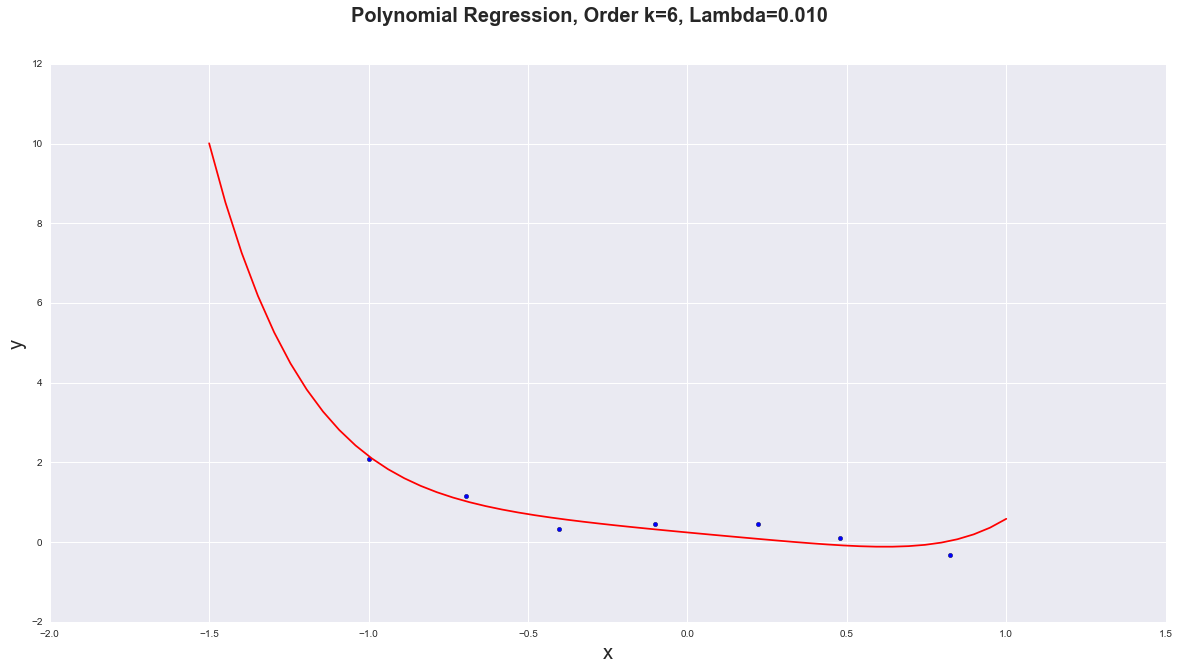

learned weights: [ 0.24165519 -0.74861709  0.1199469  -0.21036535  0.40251778  0.17091212
  0.60765013]
MSE: 0.0296524573458


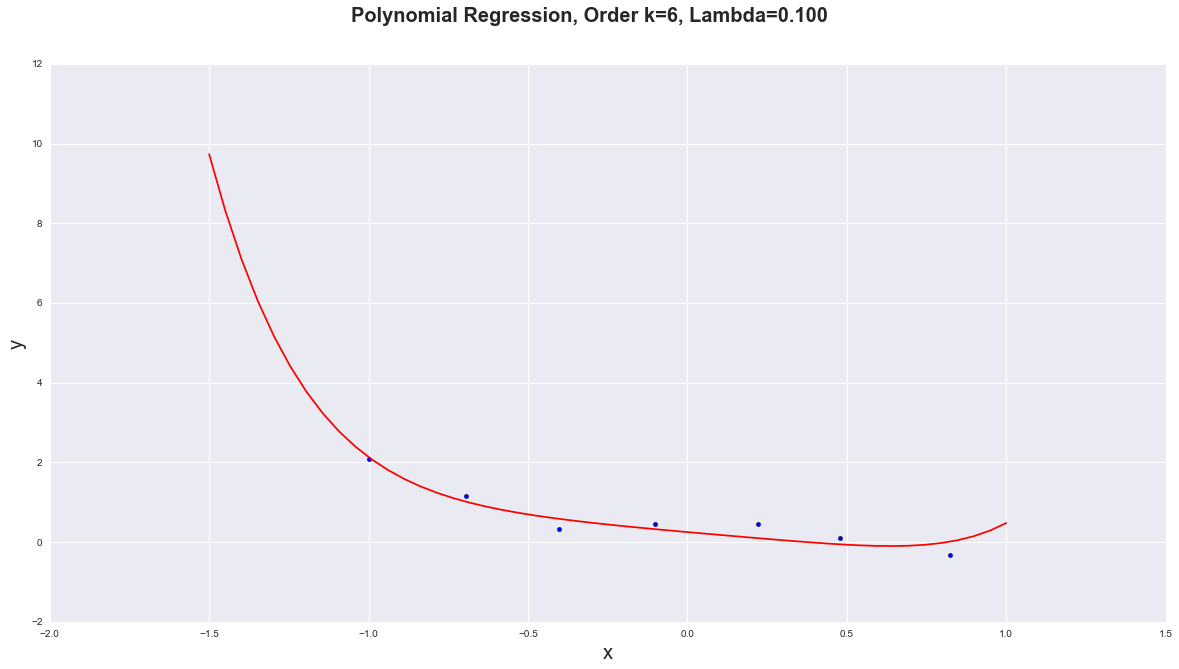

learned weights: [ 0.25099491 -0.71066246  0.12538106 -0.22993739  0.37399981  0.11294127
  0.55498971]
MSE: 0.0340679262491


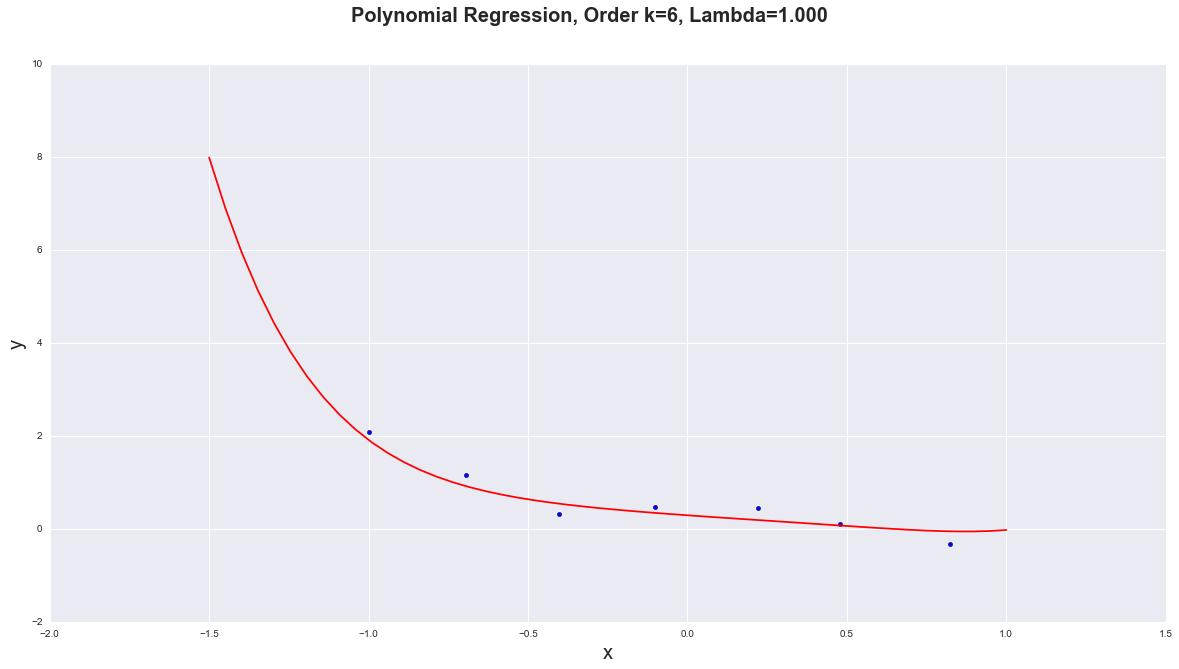

learned weights: [ 0.29069543 -0.48554546  0.15529924 -0.30854833  0.22237236 -0.17411257
  0.27467342]
MSE: 0.0638559032149


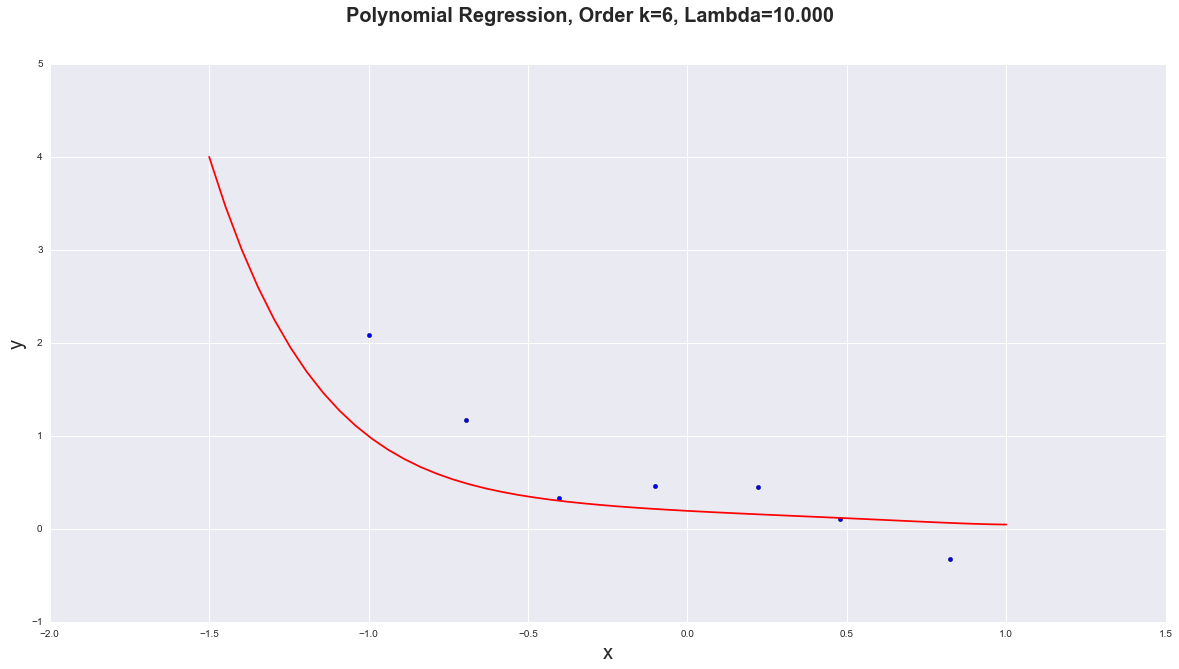

learned weights: [ 0.19287735 -0.18683328  0.11717772 -0.15375302  0.1067618  -0.13443509
  0.10386118]
MSE: 0.247236732479


In [9]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10]

for lam in lambdas:
    poly_reg(x,y,1e-4,6,100000, lam)